In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import orbit_analysis

In [60]:
data = loadtxt('results_mwlsgr.txt', skiprows=1)
peris = data[:,0]
apos = data[:,1]
t_min_rel = data[:,2]
r_rel_mins = data[:,3]
Theta = data[:,4]

In [61]:
print(peris)
print(apos)
print(Theta)
print(r_rel_mins)

[ 12.920331  12.157402   9.603597 ...,  17.794494  21.10626   21.42334 ]
[ 101.10728    94.615402  101.004284 ...,  117.938414   96.336851
  104.284405]
[ 39.015359  65.948726  40.169955 ...,  25.486586  50.288082  43.060766]
[ 61.453132  22.688614  70.458591 ...,  11.461287  17.63553   37.990657]


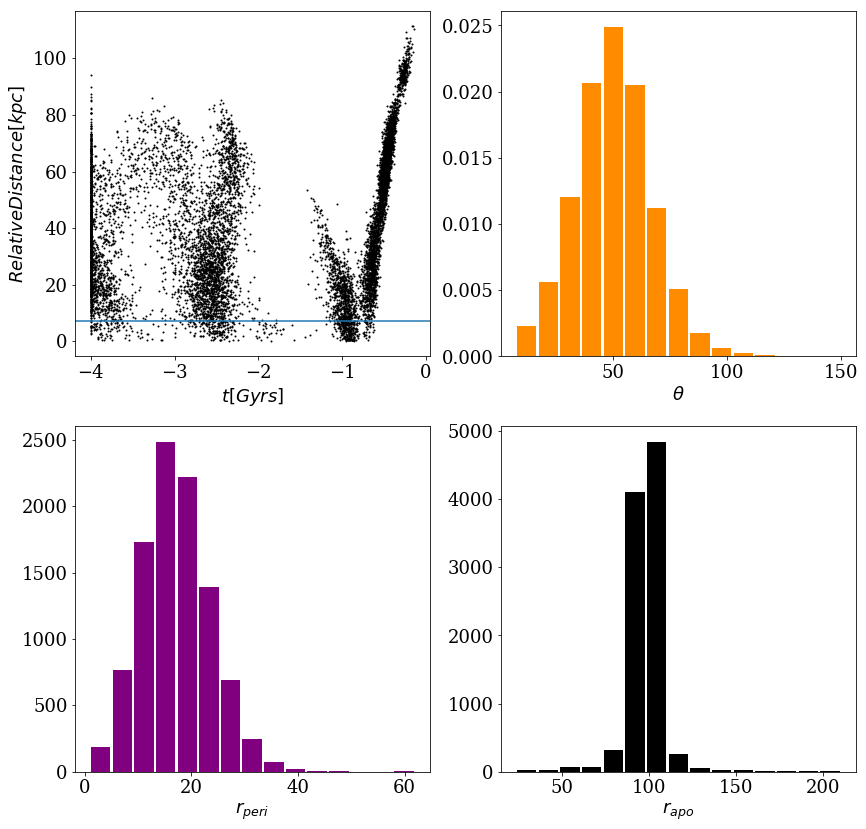

In [68]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.scatter(t_min_rel, r_rel_mins, c='k', s=1)
plt.axhline(7)
plt.ylabel('$Relative Distance [kpc]$')
plt.xlabel(r'$t[Gyrs]$')


plt.subplot(2, 2, 2)
h = plt.hist(Theta, color='darkorange', bins=15, rwidth=0.9, normed=True)
plt.xlabel(r'$\theta$')


plt.subplot(2, 2, 3)
h2 = plt.hist(peris, color='purple', bins=15, rwidth=0.9)
plt.xlabel('$r_{peri}$')

plt.subplot(2, 2, 4)
h3 = plt.hist(apos, color='k', bins=15, rwidth=0.9)
plt.xlabel('$r_{apo}$')

savefig('all_results_sgr.pdf', bbox_inches='tight', dpi=300)

In [75]:
data_l0 = loadtxt('results_mwlsgr_l0.txt', skiprows=1)
peris_l0 = data_l0[:,0]
apos_l0 = data_l0[:,1]
t_min_rel_l0 = data_l0[:,2]
r_rel_mins_l0 = data_l0[:,3]
Theta_l0 = data_l0[:,4]

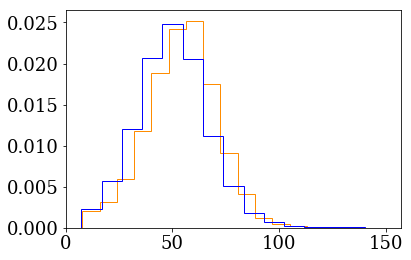

In [74]:
h = plt.hist(Theta_l0, color='darkorange', bins=15, rwidth=0.9, normed=True,histtype='step')
h = plt.hist(Theta, color='blue', bins=15, rwidth=0.9, normed=True, histtype='step')


In [80]:
enctrs = np.loadtxt('encounters_saglmc.txt')
t = enctrs[:,0]
x_sag_enc = enctrs[:,1]
y_sag_enc = enctrs[:,2]
z_sag_enc = enctrs[:,3]

r_sag_enc = (x_sag_enc**2 + y_sag_enc**2 + z_sag_enc**2)**0.5

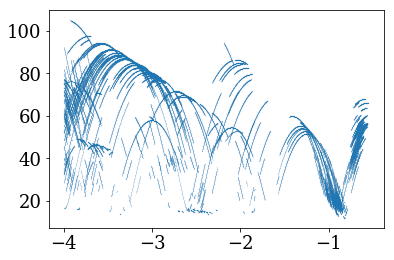

In [83]:
scatter(t, r_sag_enc, s=0.005)

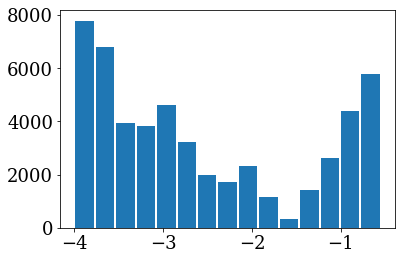

In [87]:
h4 = hist(t, bins=15, rwidth=0.9)